## Проект. Анализ бизнес-показателей 

Отдел маркетинговой аналитики Яндекс.Афиши. Необходимо предоставить данные маркетологам, чтобы помочь снизить расходы — перераспределить бюджет и отказаться от невыгодных источников трафика.

Выручка измеряется в условных единицах — у.е.

В нашем распоряжении три датасета.
Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

Структура visits_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Device — категория устройства пользователя,
 - Start Ts — дата и время начала сессии,
 - End Ts — дата и время окончания сессии,
 - Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Buy Ts — дата и время заказа,
 - Revenue — сумма заказа.

Структура costs.csv
 - source_id — идентификатор рекламного источника,
 - dt — дата проведения рекламной кампании,
 - costs — расходы на эту кампанию.

### Шаг 1. Загрузить данные и подготовить их к анализу

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

                                      Таблица visits_log

In [3]:
visits_log.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [4]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits_log.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [6]:
visits_log.duplicated().sum()

0

                                        Таблица orders_log

In [7]:
orders_log.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [8]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders_log.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [10]:
orders_log.duplicated().sum()

0

                                        Таблица costs

In [11]:
costs.head(5)

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [14]:
costs.duplicated().sum()

0

Обнаружено несоответствие типа данных в таблицах visits_log, orders_log и costs. Также заголовки столбцов в таблицах  visits_log, orders_log приведем к строчным буквам.

In [15]:
visits_log.columns = visits_log.columns.str.replace(' ', '_')
visits_log.columns = visits_log.columns.str.lower()

In [16]:
orders_log.columns = orders_log.columns.str.replace(' ', '_')
orders_log.columns = orders_log.columns.str.lower()

In [17]:
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts']) 
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts']) 

In [18]:
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts']) 

In [19]:
costs['dt'] = pd.to_datetime(costs['dt']) 

In [20]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [21]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Вывод: данные приведены в нужный формат, пропуски и дубликаты отсутствуют.

### Шаг 2. Рассчет метрик и построение графиков.

#### Рассчет продуктовой метрики.

Сделаем копию таблицы visits_log, выделим в отдельные столбцы год, месяц и неделю, а также дату.

In [23]:
product_metrik = visits_log.copy(deep=True)

In [24]:
product_metrik['session_year'] = product_metrik['start_ts'].astype('datetime64[Y]')
product_metrik['session_month'] = product_metrik['start_ts'].astype('datetime64[M]')
product_metrik['session_week'] = product_metrik['start_ts'].astype('datetime64[W]')
product_metrik['session_date'] = product_metrik['start_ts'].dt.date

Рассчитаем DAU - количество уникальных пользователей в день.

In [25]:
dau_total = product_metrik.groupby('session_date').agg({'uid' : 'nunique'}).reset_index()
print('среднее DAU = ', int(dau_total.mean()))

среднее DAU =  907


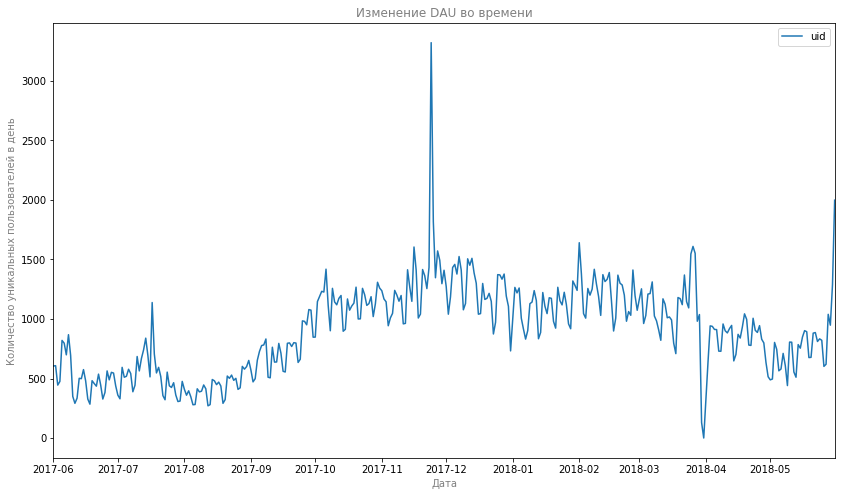

In [26]:
dau_total.plot.line(x = 'session_date', y = 'uid' , figsize = (14, 8))
plt.xlabel('Дата', color = "grey")
plt.ylabel('Количество уникальных пользователей в день', color = "grey")
plt.title('Изменение DAU во времени', color = "grey");

Рассчитаем WAU - количество уникальных пользователей в неделю.

In [27]:
wau_total = (product_metrik.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})).reset_index()
print('среднее WAU = ', int(wau_total['uid'].mean()))

среднее WAU =  5621


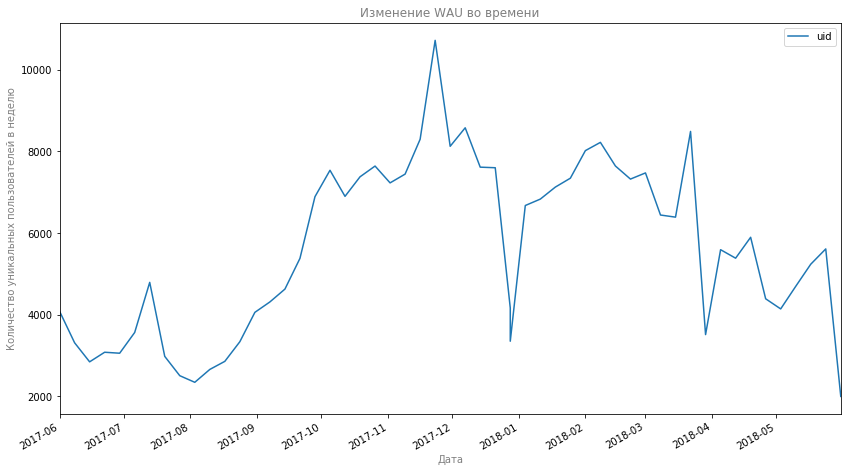

In [28]:
wau_total.plot.line(x = 'session_week', y = 'uid' , figsize = (14, 8))
plt.xlabel('Дата', color = "grey")
plt.ylabel('Количество уникальных пользователей в неделю', color = "grey")
plt.title('Изменение WAU во времени', color = "grey");

Рассчитаем МAU - количество уникальных пользователей в неделю.

In [29]:
mau_total = (product_metrik.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index())
print('среднее MAU = ', int(mau_total['uid'].mean()))

среднее MAU =  23228


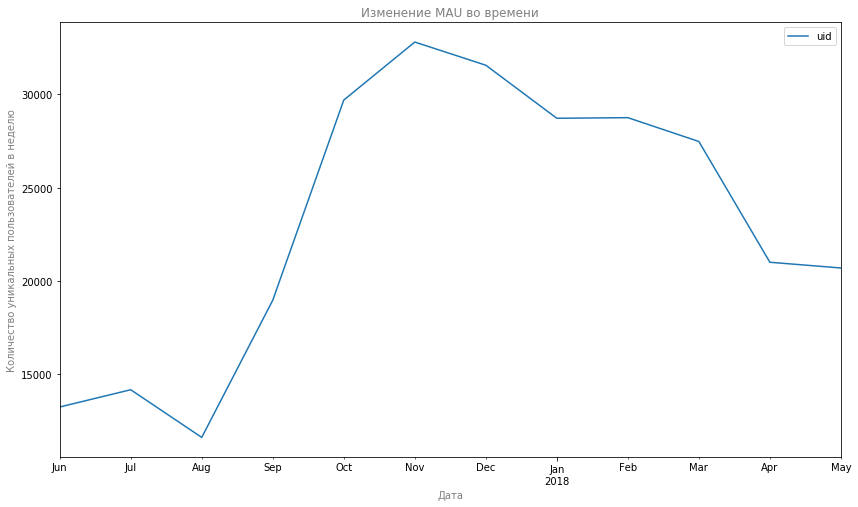

In [30]:
mau_total.plot.line(x='session_month', y = 'uid' , figsize = (14, 8))
plt.xlabel('Дата', color = "grey")
plt.ylabel('Количество уникальных пользователей в неделю', color = "grey")
plt.title('Изменение МAU во времени', color = "grey");

Вывод: наблюдаем всплеск пользователей в конце 2017 года, вообще рост пользователей начинается с сентября, скорее всего это связано с сезонностью.

#### Сколько раз за день пользователи в среднем заходят на сайт.

Посмотрим сколько раз в день пользователь заходит на сайт.

In [31]:
sessions_per_user = product_metrik.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user = sessions_per_user.reset_index()


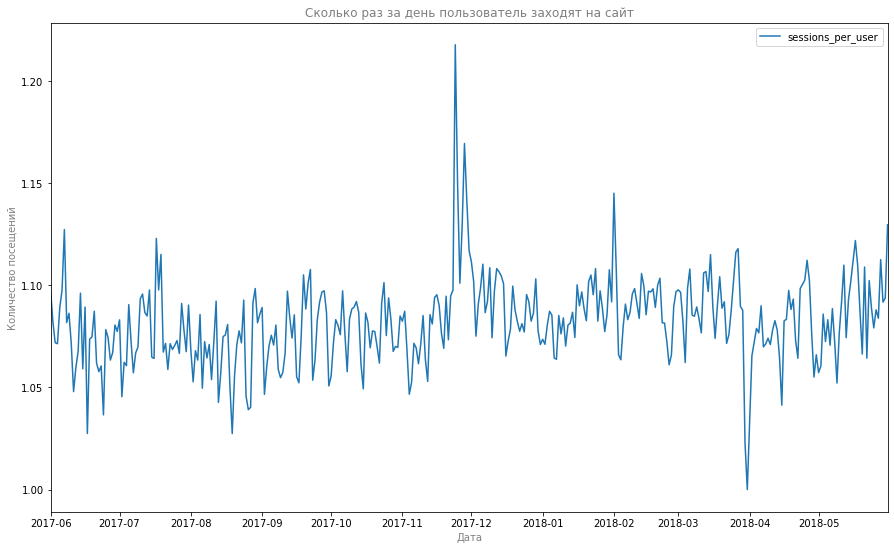

In [32]:
sessions_per_user.plot(x='session_date', y = 'sessions_per_user' , figsize = (15, 9))
plt.xlabel('Дата', color = "grey")
plt.ylabel('Количество посещений', color = "grey")
plt.title('Сколько раз за день пользователь заходят на сайт', color = "grey");

Посмотрим сколько всего пользователей заходит на сайт

In [33]:
day_quan = product_metrik.groupby('session_date').agg({'uid': 'count'}).reset_index()

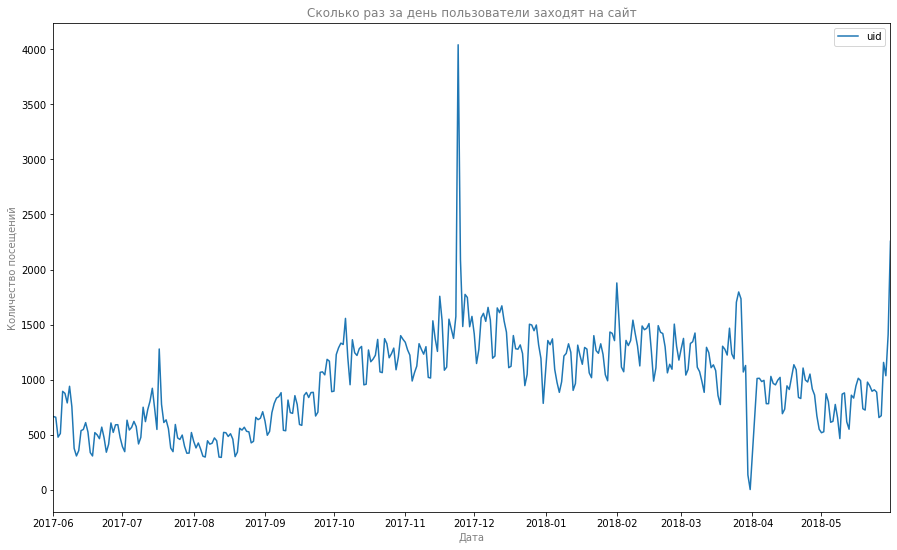

In [34]:
day_quan.plot(x='session_date', y = 'uid' , figsize = (15, 9))
plt.xlabel('Дата', color = "grey")
plt.ylabel('Количество посещений', color = "grey")
plt.title('Сколько раз за день пользователи заходят на сайт', color = "grey");

In [35]:
print('Среднее посещение сайта в день:', int(day_quan['uid'].mean()), 'раз')
print('Среднее посещение сайта пользователем в день:', int(sessions_per_user['sessions_per_user'].mean()), 'раз')

Среднее посещение сайта в день: 987 раз
Среднее посещение сайта пользователем в день: 1 раз


Вывод: на сайт в течении дня не возвращаются, всего в среднем 987 раз посещают сайт.

#### Cколько времени пользователи проводят на сайте

Посмотрим продолжительность сессии. 

In [36]:
product_metrik['session_duration_sec'] = (product_metrik['end_ts'] - product_metrik['start_ts']).dt.seconds / 60

In [37]:
product_metrik['session_duration_sec'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration_sec, dtype: float64

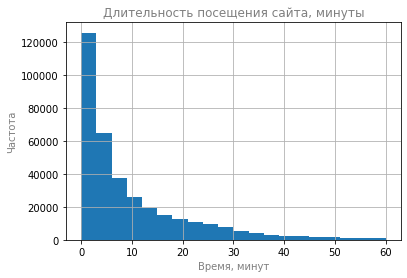

In [38]:
product_metrik['session_duration_sec'].hist(bins = 20, range = (0, 60)) 
plt.xlabel('Время, минут', color = "grey")
plt.ylabel('Частота', color = "grey")
plt.title('Длительность посещения сайта, минуты', color = "grey");

Наше распределение похоже на экспоненциальное, поэтому посмотрим медианную длительность сессии, так как она показывает 50% сессий, а как мы видим по графику, то большая часть у нас около 0, а это могут быть технические причины и все они сконцентрированны в одном значении. 

In [39]:
print('Медианная продолжнительность сессии за весь период:', int(product_metrik['session_duration_sec'].median()), 'минут') 
print('Средняя продолжнительность сессии за весь период:', int(product_metrik['session_duration_sec'].mean()), 'минут') 

Медианная продолжнительность сессии за весь период: 5 минут
Средняя продолжнительность сессии за весь период: 10 минут


#### Расчет Retention Rate.

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Найдем месяц, когда пользователь впервые проявил активность

In [40]:
first_visit_month = visits_log.groupby(['uid'])['start_ts'].min()
first_visit_month.name = 'first_visit_month'
visits_rr = visits_log.join(first_visit_month, on='uid')

In [41]:
visits_rr['first_visit_month'] = visits_rr['first_visit_month'].astype('datetime64[M]')

Рассчитаем lifetime пользователя в рамках когорты

In [42]:
visits_rr['cohort_lifetime'] = (visits_rr['start_ts'] - visits_rr['first_visit_month'])
visits_rr['cohort_lifetime'] = visits_rr['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_rr['cohort_lifetime'] = visits_rr['cohort_lifetime'].astype('int') 

Посчитаем для каждой когорты количество уникальных пользователей 

In [43]:
cohorts_rr = visits_rr.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

Найдем исходное количество пользователей в когорте, возьмем их число на нулевой месяц и переименуем.

In [44]:
initial_users_count = cohorts_rr[cohorts_rr['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Объеденим данные по когортам с исходным количеством пользователей в когорте

In [45]:
cohorts_rr = cohorts_rr.merge(initial_users_count,on = 'first_visit_month') 

Рассчитаем Retention Rate и построим сводную таблицу

In [46]:
cohorts_rr['retention'] = cohorts_rr['uid']/cohorts_rr['cohort_users'] 
cohorts_rr['first_visit_month'] = cohorts_rr['first_visit_month'].dt.strftime('%Y-%m')
retention_pivot = cohorts_rr.pivot_table(index = 'first_visit_month', 
                                      columns = 'cohort_lifetime', 
                                      values = 'retention', 
                                      aggfunc = 'sum',) 

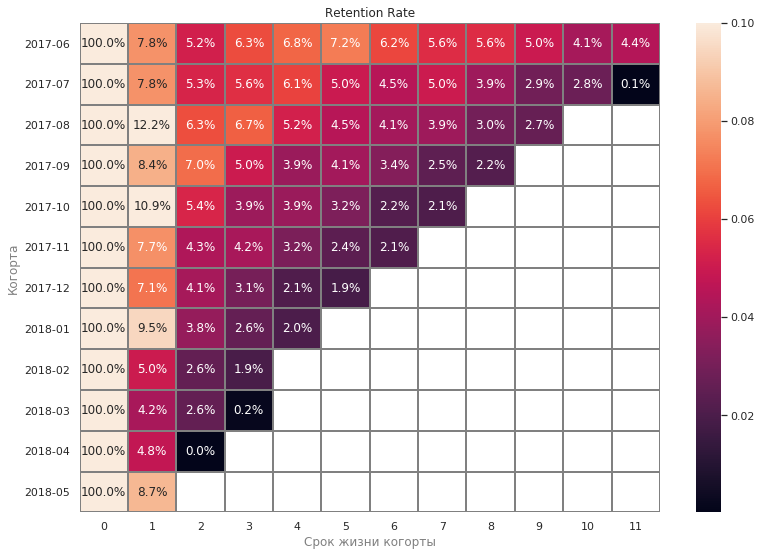

In [47]:
sns.set(style = 'white')
plt.figure(figsize = (13, 9))
sns.heatmap(retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'gray', vmax = 0.1)
plt.ylabel('Когорта', color = "grey")
plt.xlabel('Cрок жизни когорты', color = "grey")
plt.title('Retention Rate'); 

In [48]:
print('Средний RR на второй месяц жизни когорты:', (retention_pivot[1].mean() * 100).round(2), '%')

Средний RR на второй месяц жизни когорты: 7.84 %


Вывод: наблюдаем не большой возврат пользователей. 

### Метрики электронной коммерции

#### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Найдем время первого визита на сайт.

In [49]:
first_visit_time = visits_log.groupby(['uid'])['start_ts'].min()
first_visit_time.name = 'first_visit_time'
time_order = visits_log.join(first_visit_time, on='uid')

Найдем время первой покупки.

In [50]:
first_order_time = orders_log.groupby(['uid'])['buy_ts'].min()
first_order_time.name = 'first_order_time'
time_order = time_order.join(first_order_time, on='uid')

In [51]:
time_order['time'] = (time_order['first_order_time'] - time_order['first_visit_time']).dt.seconds / 60

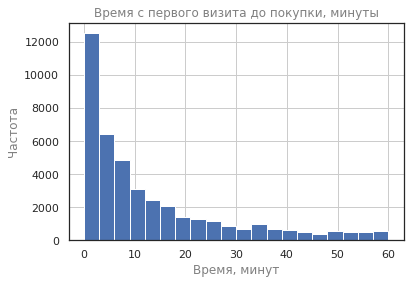

In [52]:
time_order['time'].hist(bins = 20, range = (0, 60)) 
plt.xlabel('Время, минут', color = "grey")
plt.ylabel('Частота', color = "grey")
plt.title('Время с первого визита до покупки, минуты', color = "grey");

In [53]:
print('Среднее время с первого визита на сайт до покупки:', int((time_order['time']).mean()), 'минут')
print('Медианное время с первого визита на сайт до покупки:', int((time_order['time']).median()), 'минут')

Среднее время с первого визита на сайт до покупки: 412 минут
Медианное время с первого визита на сайт до покупки: 132 минут


Вывод: как видим из графика чаще покупают в первые 10 минут , но в среднем проходит около 412 минут. Скорей всего сначала смотрят Афишу потом думают и принимают решение, либо ждут, когда появиться что - то интересное.

#### Среднее количество покупок на одного покупателя за 6 месяцев

In [54]:
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

Посчитаем количество новых покупателей

In [55]:
first_orders = orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

Построим когорты, добавим месяц первой покупки каждого покупателя.

In [56]:
cohort_sizes = (first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [57]:
orders_new = pd.merge(orders_log, first_orders, on='uid')

Сгруппируем таблицу по месяцу первой покупки и месяцу каждого заказа и посчитаем количество.

In [58]:
cohorts_orders = (orders_new.groupby(['first_order_month', 'order_month'])
                  .agg({'uid': 'count'}).reset_index())

In [59]:
orders_new = pd.merge(cohort_sizes, cohorts_orders, on= 'first_order_month')

Рассчитаем возраст когорты и количество покупок

In [60]:
orders_new['order_person'] = (orders_new['uid'] / orders_new['n_buyers'])
orders_new['age'] = (orders_new['order_month'] - orders_new['first_order_month']) / np.timedelta64(1, 'M')
orders_new['age'] = orders_new['age'].round().astype('int')
orders_new['first_order_month'] = orders_new['first_order_month'].dt.strftime('%Y-%m')

In [61]:
pivot_order = orders_new.pivot_table(index='first_order_month', columns='age', values='order_person', aggfunc='mean',) 
pivot_order = pivot_order.cumsum(axis = 1)

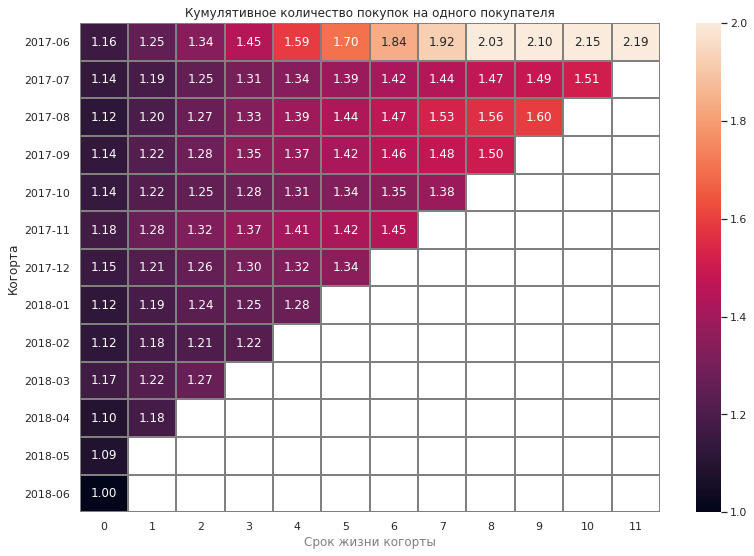

In [62]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Кумулятивное количество покупок на одного покупателя')
sns.heatmap(pivot_order, annot = True, fmt ='.2f', linewidths = 1, linecolor = 'gray',vmax = 2)
plt.xlabel('Cрок жизни когорты', color = "grey")
plt.ylabel('Когорта');

In [63]:
m6_cum_avg = pivot_order.mean(axis=0)[5]

In [64]:
print('Среднее количество покупок на одного покупателя за 6 месяев:', m6_cum_avg.round(2))

Среднее количество покупок на одного покупателя за 6 месяев: 1.43


Вывод: не так часто люди совершают покупки.

#### Рассчет среднего чека.

In [65]:
average_check = orders_log.groupby('buy_ts').agg({'revenue':'sum'}).reset_index() 

In [66]:
average_check['month'] = average_check['buy_ts'].astype('datetime64[M]')  

In [67]:
average_check = average_check.groupby(['month']).agg({'revenue': 'mean'}).reset_index()
average_check['month'] = average_check['month'].dt.strftime('%Y-%m-%d')

In [68]:
average_check.style.format({'revenue':'{:.2}'}).bar(subset=['revenue',], color='lightblue')\
            .set_caption('Средний чек')                 

In [69]:
fig = px.bar(average_check, x = "month", y = "revenue", color = "revenue", title = "Средний чек ",
             labels={'month':'Период','revenue':'Средний чек'} )
fig.show()

In [70]:
print('Средний чек:', int(average_check['revenue'].mean()), 'y.e.')

Средний чек: 5 y.e.


Вывод: средний сек варьируется в дианазоне 4 - 6.5 у.е. Наиболее высокий чек был в декабре 2017 года и в среднем составил 6.5. у.е.

####  LTV

Маржинальность сервиса -100 %. LTV (от англ. lifetime value) — «пожизненная» ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. При расчёте LTV обычно обращаются к валовой прибыли с клиента за период.

In [71]:
margin_rate = 1

К таблице с заказами добавим количество новых покупателей first_orders.

In [72]:
orders_first_month = pd.merge(orders_log, first_orders, on='uid')

Сгруппируем таблицу по месцу певой покупки и месяцу каждго заказа и сложим выручку.

In [73]:
cohorts_ltv = ( orders_first_month.groupby(['first_order_month', 'order_month'])
               .agg({'revenue': 'sum'}).reset_index())

 Добавим в таблицу cohorts_ltv данные о том, сколько людей первый раз совершили покупку в каждый месяц

In [74]:
report_ltv = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

In [75]:
report_ltv['gp'] = report_ltv['revenue'] * margin_rate
report_ltv['age'] = (report_ltv['order_month'] - report_ltv['first_order_month']) / np.timedelta64(1, 'M')
report_ltv['age'] = report_ltv['age'].round().astype('int')

In [76]:
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']
report_ltv['first_order_month'] = report_ltv['first_order_month'].dt.strftime('%Y-%m')
output_ltv = report_ltv.pivot_table(index ='first_order_month', columns ='age', values ='ltv', aggfunc ='mean')
output_ltv = output_ltv.cumsum(axis = 1)

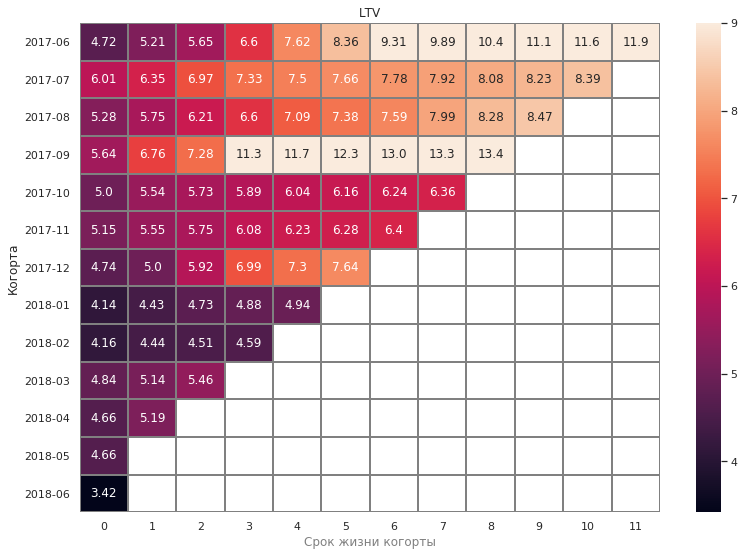

In [77]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output_ltv, annot = True, fmt = '.3', linewidths = 1, linecolor = 'gray', vmax = 9)
plt.xlabel('Cрок жизни когорты', color = "grey")
plt.ylabel('Когорта'); 

In [78]:
m6_cum_ltv = output_ltv.mean(axis=0)[5]
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv.round(2), 'y.e.')

Средний LTV за 6 месяцев после первой покупки: 7.97 y.e.


Вывод: чтобы вложения в маркетинг окупались, привелечение одного покупателя не должно превышать 7.97 у.е. 

### Маркетинговые метрики

#### Расчет общей суммы расходов на маркетинг.

In [79]:
costs_all = costs['costs'].sum()

In [80]:
costs['month'] = costs['dt'].astype('datetime64[M]')  

In [81]:
source = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()
source['month'] = source['month'].dt.strftime('%Y-%m-%d')

In [82]:
output_costs = source.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
output_costs.style.background_gradient(cmap='Blues', axis=0).set_caption('Затраты по источникам')

In [83]:
fig = px.line(source, x = 'month', y = 'costs', color = 'source_id', 
             height = 700, title = "Распеределение трат по источникам", 
             labels = {'costs' : 'Сумма затрат','month' : 'Дата затрат'})
fig.show();

In [84]:
print('Общие расходы на маркетинг:', costs_all, 'y.e.')

Общие расходы на маркетинг: 329131.62 y.e.


Вывод: наибольшие затраты на маркетинг приходились на октябрь 2017 - февраль 2018. Источник 3 имеет наибольшие затраты на маркетинг.

#### Расчет среднего САС на одного покупателя 

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании.

Рассчитаем САС для всего проекта.

In [85]:
monthly_costs = costs.groupby('month').sum().reset_index()

In [86]:
report_ltv['first_order_month'] = pd.to_datetime(report_ltv['first_order_month'])  

In [87]:
report_cac = pd.merge(report_ltv, monthly_costs, left_on = 'first_order_month', right_on = 'month') 
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
report_cac['first_order_month'] = report_cac['first_order_month'].dt.strftime('%Y-%m-%d')
output_cac = report_cac.groupby('first_order_month').agg({'cac' : 'mean'})

In [88]:
output_cac.style.format({'cac':'{:.3}'}) \
          .background_gradient(cmap='Blues', axis=0).set_caption('Средняя стоимость привлечения клиента ')

Рассчитаем САС для каждого источника трафика

In [89]:
visits_log['month'] = visits_log['start_ts'].astype('datetime64[M]')  

In [90]:
group=['source_id']

In [91]:
costs_sourse = costs.groupby(group)['costs'].sum()
users = visits_log.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first','month':'first'})
users = users.reset_index()

In [92]:
buyers = users.query('uid in @orders_log.uid')
buyers = buyers.groupby(group).agg({'uid': 'nunique'})

In [93]:
report_traffic = buyers.join(costs_sourse)
report_traffic['cost_per_buyer'] = report_traffic['costs'] / report_traffic['uid']

In [94]:
output_traffic = report_traffic.pivot_table(index='source_id', values='cost_per_buyer', aggfunc='mean')
output_traffic.style.format({'cost_per_buyer':'{:.3}'})\
              .bar(subset=['cost_per_buyer',], color='lightblue')\
              .set_caption('Средняя стоимость привлечения клиента для источника трафика')                

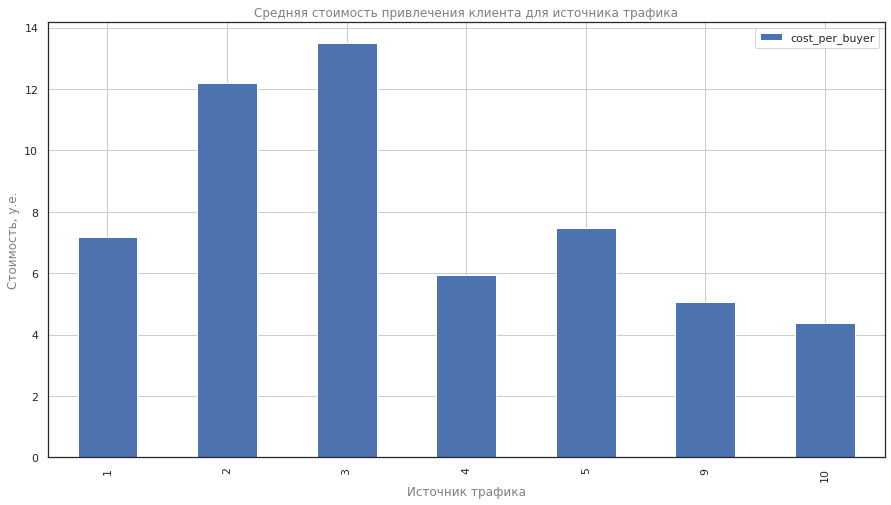

In [95]:
output_traffic = output_traffic.reset_index()
output_traffic.plot( x = 'source_id' ,kind='bar', legend = True, grid = True, figsize = (15, 8))
plt.xlabel('Источник трафика', color = "grey")
plt.ylabel('Стоимость, у.е.', color = "grey")
plt.title('Средняя стоимость привлечения клиента для источника трафика', color = "grey");

In [96]:
print('Средняя стоимость привлечения клиента:', (output_cac['cac'].mean()).round(2), 'y.e.')

Средняя стоимость привлечения клиента: 9.15 y.e.


Вывод: наиболее выскоие затраты по привлечению клиентов у 2 и 3 источника.

#### Рассчет ROMI по когортам в разрезе источников

In [97]:
first_order_month = orders_log.groupby(['uid'])['buy_ts'].min()
first_order_month.name = 'first_order_month'
orders_log = orders_log.join(first_order_month, on='uid')
orders_log['first_order_month'] = orders_log['first_order_month'].astype('datetime64[M]')  

Напишем фукнцию для вывода всех данных

In [98]:
orders_log = orders_log[orders_log['first_order_month'] != '2018-06-01T00:00:00.000000000']

Source: 1


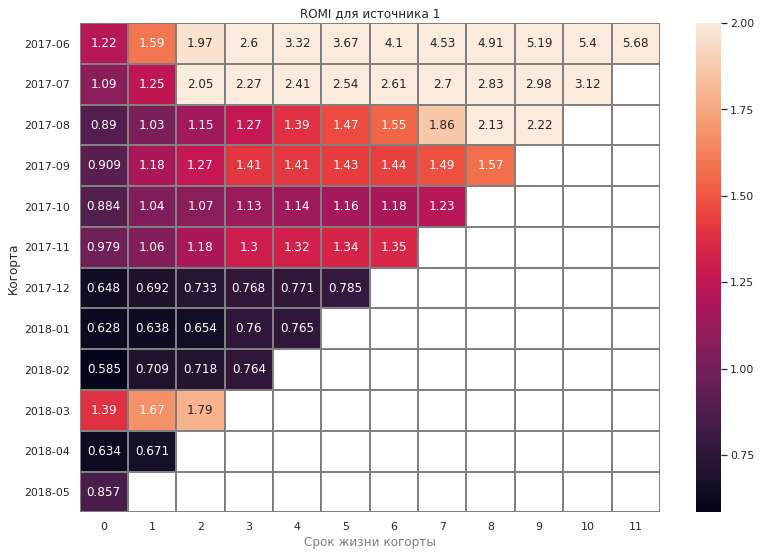

Source: 2


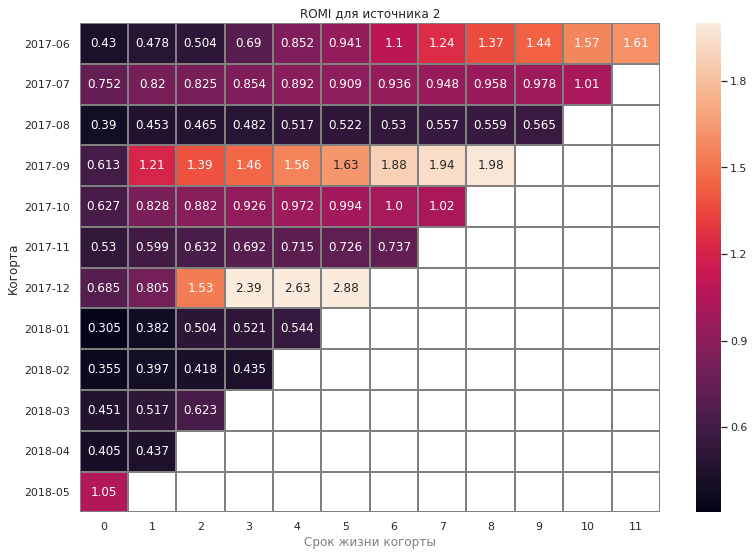

Source: 3


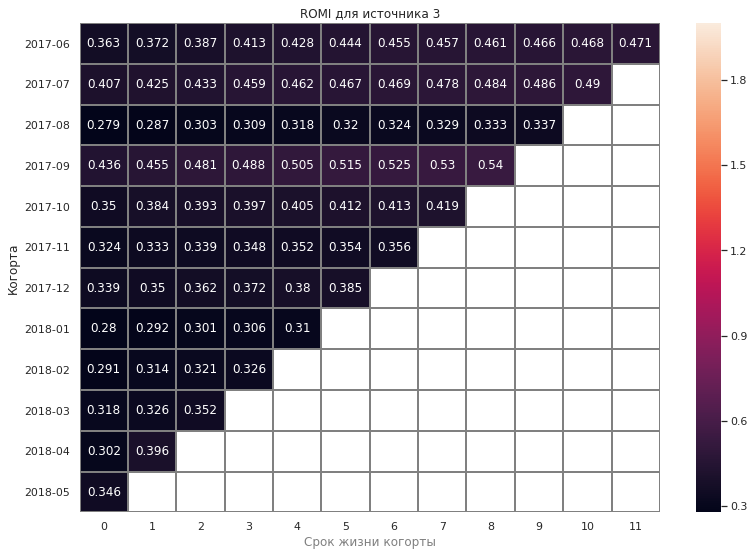

Source: 4


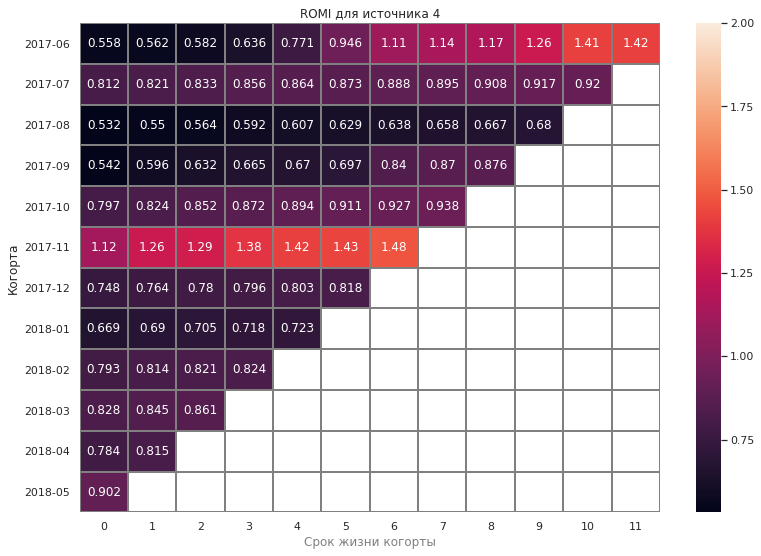

Source: 5


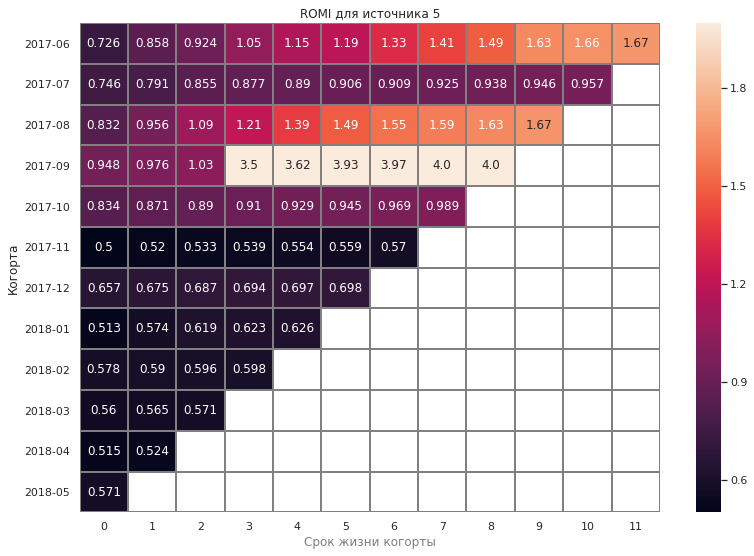

Source: 9


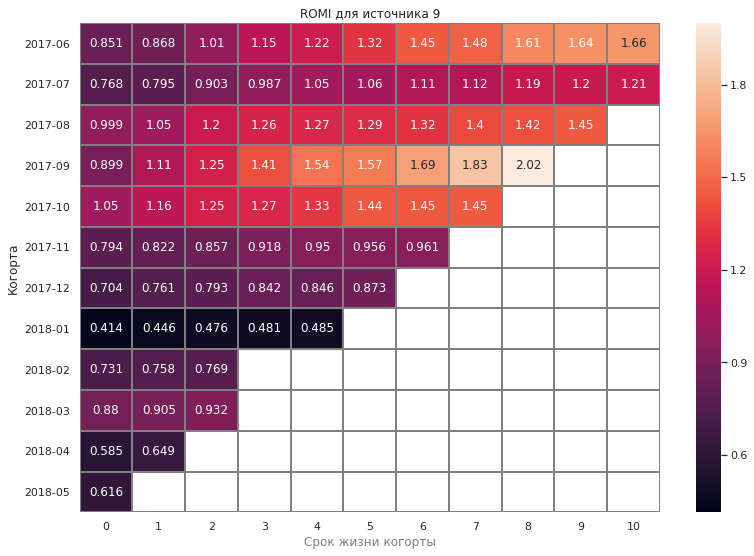

Source: 10


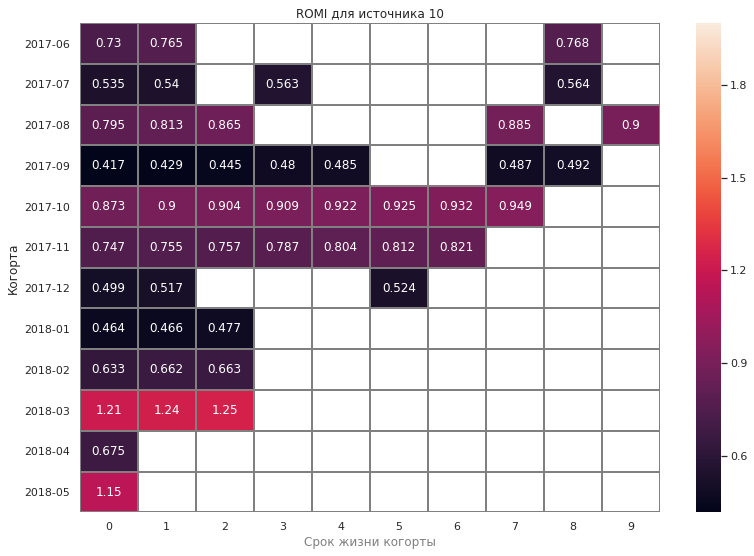

In [99]:
sources = [1, 2, 3, 4, 5, 9, 10]
for source  in sources:
    print(f'Source: {source}')
    # отбираем только платящих из нужного источника
    source_users = users.query('source_id == @source')['uid'].unique()
    source_orders = orders_log.query('uid in @source_users')
    cohort_size = (source_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index())
    cohort_size.columns = ['first_order_month', 'n_buyers']
    cohorts_3 = (source_orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index())
    cohorts_3['first_order_month'] = pd.to_datetime(cohorts_3['first_order_month'])
    cohorts_3['order_month'] = pd.to_datetime(cohorts_3['order_month'])
    
    report_4 = pd.merge(cohort_size, cohorts_3, on = 'first_order_month')
    report_4['gp'] = report_4['revenue'] * margin_rate
    report_4['age'] = (report_4['order_month'] - report_4['first_order_month']) / np.timedelta64(1, 'M')
    report_4['age'] = report_4['age'].round().astype('int')
    report_4['ltv'] = report_4['gp'] / report_4['n_buyers']
    report_4['first_order_month'] = report_4['first_order_month'].dt.strftime('%Y-%m')
    output_4 = report_4.pivot_table(index = 'first_order_month', columns = 'age', values = 'ltv', aggfunc = 'mean')
    output_4 = output_4.cumsum(axis = 1)
    
    
    #считаем САС для нужного источника
    source_costs = costs.query('source_id == @source')
    source_costs = source_costs.groupby('month').agg({'costs' : 'sum'})
    source_costs = source_costs.join(cohort_size.set_index ('first_order_month'))
    source_costs['cac'] = source_costs['costs'] / source_costs ['n_buyers']
    
    #считаем ROI
    output_4 = output_4.div(source_costs['cac'], axis = 0)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI для иcточника {}'.format(source))
    sns.heatmap(output_4, annot=True, fmt='.3', linewidths=1, linecolor = 'gray',vmax = 2)
    plt.xlabel('Cрок жизни когорты', color = "grey")
    plt.ylabel('Когорта')
    plt.show(); 

## Шаг 3. Выводы

#### Определить источники трафика, на которые маркетологам стоит делать упор.

Для данного анализа оспользованны метрики ROMI (как быстро в среднем когорты окупаются), САС (во сколько обходится новый клиент компании), LTV (итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок). Согласно проведенным исследованиям, наиболее перспективные и быстро окупаемые переходы из Источника 1 и Источника 9, стоимость привлечения клиента по таким источникам 7.19 у.е. и 5.07 у.е. соответсвенно. Чтобы вложения в маркетинг окупались, привелечение одного покупателя не должно превышать 7.97 у.е.. Источник 3 не имеет перспектив. 

#### Выводы, после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.

Продуктовые метрики:
 - среднее количество уникальных пользователей в день DAU = 907
 - среднее количество уникальных пользователей в неделю WAU = 5621
 - среднее количество уникальных пользователей в неделю MAU = 23228
 - среднее посещение сайта в день = 987 раз
 - среднее посещение сайта пользователем в день = 1 раз
 - медианная продолжнительность сессии за весь период =  5 минут
 - средняя продолжнительность сессии за весь период = 10 минут
 - средний RR (возврат пользователей) на второй месяц жизни когорты: 7.84 %

Метрики электронной коммерции:
 - среднее время с первого визита на сайт до покупки =  412 минут
 - медианное время с первого визита на сайт до покупки = 132 минуты
 - среднее количество покупок на одного покупателя за 6 месяев =  1.43
 - средний чек =  5 y.e.
 - cредний LTV за 6 месяцев после первой покупки = 7.97 y.e.

Магкетинговые метрики:
 - общие расходы на маркетинг =  329131.62 y.e.
 - средняя стоимость привлечения клиента САС = 9.15 y.e.
 - перпективные переходы из Источника 1 и 9

#### Итоги когортного анализа

Наблюдаем рост числа посетителей с сентября 2017 года по начало 2018, потом идет спад, вероятно это связанно с сезонностью и премьерами.  На сайт в течении дня не возвращаются. Люди не задерживаются сайте, 5-10 минту впослне достаточно, чтобы изучить Афишу. Пользователей возвращается на сайт очень мало, поскольку это предметы не первой необходимости и вероятно по другому проводят досуг. Скорей всего сначала смотрят Афишу потом думают и принимают решение, либо ждут, когда появиться что - то интересное. Наблюдаем что в среднем 1-2 раза за полгода пользователи совершают покупки, это может говорить о том что есть другие интересные развлечения у пользователей. Средний чек варьируется от 4 до 6.5 у.е. и наибольший он был в декабре 2017, вероятно люди совершали покупки билетов в виде подарков а также развлечений на новогодних каникулах. Чтобы вложения в маркетинг окупались, привелечение одного покупателя не должно превышать 7.97 у.е. Наибольшие траты на маркетинг наблюдались с ноября 2017 по февраль 2018. Наиболее выскоие затраты по привлечению клиентов у Источника 2 и 3. Наиболее перспективные когорты с июня по  ноябрь 2017 года  для Источников 1 и 9. 